In [1]:
import pandas as pd
import numpy as np
from collections import deque

# Load the dataset
df = pd.read_csv("PL_integrated_dataset_10years.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Binary target: 1 if home team won, 0 otherwise
df['HomeWin'] = (df['HomePoints'] == 3).astype(int)

# Sort by date for chronological processing
df = df.sort_values('Date').reset_index(drop=True)
print(df)

      AC  AF  AR  AS  AST  AY                AwayTeam  B365A  B365D  B365H  \
0      3  13   0   7    3   4             Aston Villa   4.00   3.60   2.00   
1      8  16   0  18   10   3            Swansea City  11.00   5.00   1.36   
2      2  13   0  11    5   2                 Watford   5.50   3.90   1.70   
3      3  17   0  10    5   4              Sunderland   4.33   3.50   1.95   
4      2  12   0   9    4   3               Tottenham   6.00   4.00   1.65   
...   ..  ..  ..  ..  ...  ..                     ...    ...    ...    ...   
3769   1  16   0   3    0   2          Leicester City   8.50   5.25   1.33   
3770   0   9   0  10    6   1         West Ham United   2.20   3.80   3.00   
3771   6   5   0  20    5   0         Manchester City   1.60   4.20   5.00   
3772  11   8   0  23    8   1  Brighton & Hove Albion   1.70   4.33   4.20   
3773   3   9   0  13    7   1               Brentford   2.45   3.70   2.70   

      ...     Home_ELO     Away_ELO  ELO_Difference Home_Goals_

In [2]:
import pandas as pd
from IPython.display import display  # Jupyter/Colab/Lab

# --- Load & prep ---
df = pd.read_csv("PL_integrated_dataset_10years.csv")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
if "HomePoints" in df.columns and "HomeWin" not in df.columns:
    df["HomeWin"] = (df["HomePoints"] == 3).astype(int)
df = df.sort_values("Date").reset_index(drop=True)

# --- Keep only these columns (use what's available) ---
keep_cols = [
    "Date", "HomeTeam", "Home_ELO","AwayTeam", "Away_ELO", "ELO_Difference",
    "xG_difference",
    "ELO_Predicted_Winner",
    "xG_Predicted_Winner",
    "HomeWin"
]
cols = [c for c in keep_cols if c in df.columns]
sub = df[cols].copy()

# --- Light formatting for display ---
if "Date" in sub.columns:
    sub["Date"] = sub["Date"].dt.strftime("%Y-%m-%d")

for c in ["Home_ELO", "Away_ELO", "ELO_Difference", "Home_Goals_vs_xG", "Away_Goals_vs_xG"]:
    if c in sub.columns:
        sub[c] = sub[c].round(2)

tick_map = {True: "✓", False: "✗", 1: "✓", 0: "✗"}
for c in ["HomeWin"]:
    if c in sub.columns:
        sub[c] = sub[c].map(tick_map).fillna(sub[c].astype(str))

# --- Show a nice HTML table (adjust head() rows as you like) ---
display(sub.head(50))


,Date,HomeTeam,Home_ELO,AwayTeam,Away_ELO,ELO_Difference,ELO_Predicted_Winner,xG_Predicted_Winner,HomeWin
0,2015-08-08,Bournemouth,1594.60,Aston Villa,1577.90,16.70,H,H,0
1,2015-08-08,Chelsea,1890.96,Swansea City,1670.61,220.35,H,A,0
2,2015-08-08,Everton,1706.56,Watford,1574.09,132.47,H,H,0
3,2015-08-08,Leicester City,1633.62,Sunderland,1605.13,28.49,H,H,1
4,2015-08-08,Manchester United,1810.34,Tottenham,1730.68,79.66,H,A,1
5,2015-08-08,Norwich City,1615.21,Crystal Palace,1646.78,-31.57,A,A,0
6,2015-08-09,Arsenal,1851.23,West Ham United,1596.60,254.63,H,H,0
7,2015-08-09,Newcastle United,1587.62,Southampton,1717.71,-130.09,A,H,0
8,2015-08-09,Stoke City,1698.31,Liverpool,1752.83,-54.52,A,H,0
9,2015-08-10,West Bromwich Albion,1635.62,Manchester City,1882.48,-246.86,A,A,0


In [18]:
teams = pd.unique(df[['HomeTeam', 'AwayTeam']].values.ravel())

# Use deques to track trailing data
last5_xg = {team: deque(maxlen=5) for team in teams}
last5_results = {team: deque(maxlen=5) for team in teams}

# Create new feature columns
df['home_team_avg_xG_last5'] = np.nan
df['away_team_avg_xG_last5'] = np.nan
df['home_team_win_rate_last5'] = np.nan
df['away_team_win_rate_last5'] = np.nan

# Loop through matches and populate rolling stats
for idx, row in df.iterrows():
    home, away = row['HomeTeam'], row['AwayTeam']

    # Only compute if we have 5 past games
    if len(last5_xg[home]) == 5:
        df.at[idx, 'home_team_avg_xG_last5'] = np.mean(last5_xg[home])
    if len(last5_xg[away]) == 5:
        df.at[idx, 'away_team_avg_xG_last5'] = np.mean(last5_xg[away])

    if len(last5_results[home]) == 5:
        df.at[idx, 'home_team_win_rate_last5'] = sum(last5_results[home]) / 5 * 100
    if len(last5_results[away]) == 5:
        df.at[idx, 'away_team_win_rate_last5'] = sum(last5_results[away]) / 5 * 100

    # Update deques with current match stats
    last5_xg[home].append(row['Home_xG'])
    last5_xg[away].append(row['Away_xG'])

    last5_results[home].append(1 if row['HomePoints'] == 3 else 0)
    last5_results[away].append(1 if row['AwayPoints'] == 3 else 0)
    
# Feature 1: xG difference
df['xG_difference'] = df['home_team_avg_xG_last5'] - df['away_team_avg_xG_last5']

# Feature 2: win% difference
df['win_pct_diff'] = df['home_team_win_rate_last5'] - df['away_team_win_rate_last5']

# Feature 3: Elo rating difference
df['ELO_Difference'] = df['Home_ELO'] - df['Away_ELO']

# Drop rows with missing data (typically early season games)
df.dropna(subset=['xG_difference', 'win_pct_diff', 'ELO_Difference'], inplace=True)

In [19]:
# 8/1/1 split based on dates
train_df = df[df['Date'] < '2023-07-01']
val_df   = df[(df['Date'] >= '2023-07-01') & (df['Date'] < '2024-07-01')]
test_df  = df[df['Date'] >= '2024-07-01']

print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")


Train: 2684, Validation: 365, Test: 365


In [11]:
from sklearn.preprocessing import StandardScaler

features = ['xG_difference', 'win_pct_diff', 'ELO_Difference']

X_train = train_df[features]
X_val = val_df[features]
X_test = test_df[features]

y_train = train_df['HomeWin']
y_val = val_df['HomeWin']
y_test = test_df['HomeWin']

# Standardize features using training set stats
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

best_f1 = 0
best_model = None
best_C = None

# Try different regularization strengths
for C in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    f1 = f1_score(y_val, y_val_pred)
    print(f"C={C}: Validation F1 = {f1:.4f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_C = C

C=0.01: Validation F1 = 0.6115
C=0.1: Validation F1 = 0.6211
C=1: Validation F1 = 0.6192
C=10: Validation F1 = 0.6192
C=100: Validation F1 = 0.6192


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

best_f1 = -1.0
best_model = None
best_C = None
best_train_acc = None
best_val_acc = None

# Try different regularization strengths
for C in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred   = model.predict(X_val_scaled)

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc   = accuracy_score(y_val, y_val_pred)
    val_f1    = f1_score(y_val, y_val_pred)

    print(f"C={C:<6} | Train Acc = {train_acc:.4f} | Val Acc = {val_acc:.4f} | Val F1 = {val_f1:.4f}")

    # Select best by validation F1
    if val_f1 > best_f1:
        best_f1 = val_f1
        best_model = model
        best_C = C
        best_train_acc = train_acc
        best_val_acc = val_acc

print("\nSelected by Validation F1:")
print(f"Best C = {best_C}")
print(f"Best Val F1 = {best_f1:.4f}")
print(f"Corresponding Train Accuracy = {best_train_acc:.4f}")
print(f"Corresponding Validation Accuracy   = {best_val_acc:.4f}")


C=0.01   | Train Acc = 0.6585 | Val Acc = 0.6747 | Val F1 = 0.6115
C=0.1    | Train Acc = 0.6651 | Val Acc = 0.6747 | Val F1 = 0.6211
C=1      | Train Acc = 0.6647 | Val Acc = 0.6720 | Val F1 = 0.6192
C=10     | Train Acc = 0.6647 | Val Acc = 0.6720 | Val F1 = 0.6192
C=100    | Train Acc = 0.6647 | Val Acc = 0.6720 | Val F1 = 0.6192

Selected by Validation F1:
Best C = 0.1
Best Val F1 = 0.6211
Corresponding Train Accuracy = 0.6651
Corresponding Validation Accuracy   = 0.6747


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict and evaluate
y_test_pred = best_model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, digits=3)

print(f"Test Accuracy: {test_accuracy:.6f}")
print(f"Test F1 Score: {test_f1:.6f}")
print("Classification Report:\n", class_report)

Test Accuracy: 0.672000
Test F1 Score: 0.596721
Classification Report:
               precision    recall  f1-score   support

           0      0.719     0.729     0.724       221
           1      0.603     0.591     0.597       154

    accuracy                          0.672       375
   macro avg      0.661     0.660     0.660       375
weighted avg      0.671     0.672     0.671       375



In [9]:
# Show feature weights
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': best_model.coef_[0]
})
print("Model Coefficients:\n", coef_df)
print("Intercept:", best_model.intercept_[0])


Model Coefficients:
           Feature  Coefficient
0   xG_difference     0.212214
1    win_pct_diff    -0.097237
2  ELO_Difference     0.772868
Intercept: -0.23422106848133226


C:\Users\tuank\AppData\Local\Temp\ipykernel_29260\1072681502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Feature', y='Coefficient', palette='coolwarm')


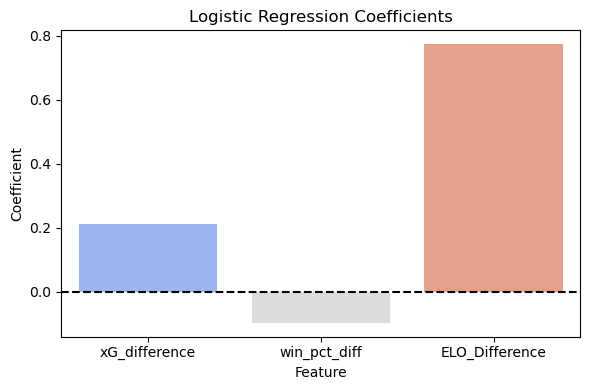

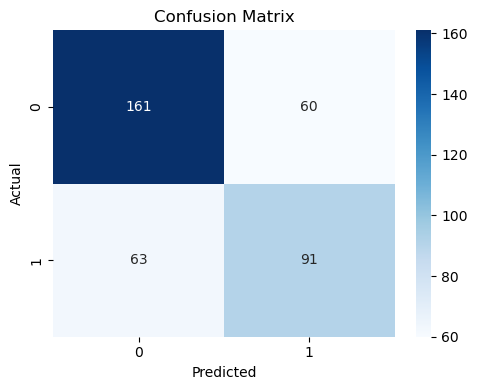

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances
plt.figure(figsize=(6, 4))
sns.barplot(data=coef_df, x='Feature', y='Coefficient', palette='coolwarm')
plt.title("Logistic Regression Coefficients")
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

# Confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

---
# __Report__
---

## Logistic Regression Model Report: Predicting Premier League Home Wins

### Objective

This report outlines a machine learning pipeline developed to predict whether the home team wins a Premier League match. The classification target is binary:

* 1: Home team earns 3 points (win)
* 0: Otherwise (draw or loss)

The model uses three engineered features:

1. **xG_difference**: Trailing 5-match average expected goals (xG) of home team minus that of the away team
2. **ELO_Difference**: Elo rating of the home team minus the away team
3. **win_pct_diff**: Win percentage over the past 5 matches for the home team minus that of the away team

The dataset spans 10 seasons (2015 to 2025), with an 8/1/1 split for training, validation, and testing.

---

### Data Preparation

* Source: `PL_integrated_dataset_10years.csv`
* Target: `HomeWin` = 1 if `HomePoints == 3`, else 0
* Date parsing and chronological sorting to avoid data leakage

#### Feature Engineering

* Trailing 5-match statistics computed using rolling window techniques
* xG values are averaged over the last 5 games per team
* Win percentages are calculated based on number of wins in last 5 games (no partial credit for draws)
* Rows with insufficient history are removed

---

### Splitting Strategy

* **Training**: Matches before July 1, 2023
* **Validation**: July 1, 2023 – June 30, 2024
* **Test**: July 1, 2024 onwards

StandardScaler was fit on training data only and applied to all three datasets to standardize features.

---

### Model Training

A logistic regression classifier was used with regularization hyperparameter `C` tuned on the validation set.

**Hyperparameter Tuning (C values):**

* Tried: [0.01, 0.1, 1, 10, 100]
* Best performing `C`: **0.1**

---

### Test Set Evaluation (2024–2025 Season)

* **Accuracy**: 67.2%
* **F1 Score**: 0.597
* **Confusion Matrix**:

|                 | Predicted: No Win | Predicted: Win |
| --------------- | ----------------- | -------------- |
| **Actual: No**  | 161               | 60             |
| **Actual: Win** | 63                | 91             |

* **Classification Report**:

```
              precision    recall  f1-score   support
           0      0.719     0.729     0.724       221
           1      0.603     0.591     0.597       154
    accuracy                          0.672       375
```

---

### Model Coefficients (Standardized Features)

| Feature        | Coefficient |
| -------------- | ----------- |
| xG_difference  | +0.211      |
| win_pct_diff   | -0.096      |
| ELO_Difference | +0.773      |
| **Intercept**  | -0.234      |


$
\text{HomeWin} = -0.234 + 0.211 \cdot \text{xG\_difference} - 0.096 \cdot \text{win\_pct\_diff} + 0.773 \cdot \text{ELO\_Difference}
$


---

### Interpretation

* **ELO_Difference** is the most influential predictor: a stronger home team (by Elo) significantly increases the odds of a win.
* **xG_difference** also positively contributes, reflecting recent attacking strength.
* **win_pct_diff** had a minor negative influence, possibly due to overlap with Elo and xG capturing form better.

---

### Conclusion

This logistic regression model, trained with properly lagged, non-leaking features and time-based validation, achieves a strong 67.2% accuracy on the 2024–2025 test season. The inclusion of xG difference and Elo difference provides interpretable and effective predictors. This model is suitable as a baseline or interpretable benchmark for football match prediction.

Further improvements could include:

* Incorporating player-level stats
* Using ensemble models like Random Forest or XGBoost
* Tuning decision thresholds to favor precision or recall depending on use case
